In [1]:
# import Library
import pandas as pd
import nltk

In [2]:
# Reading Dataset
data = pd.read_csv('dataset/amazon.tsv',sep='\t')

In [3]:
# Showing file information

# Column Name      ->       Discription
# ------------------------------------------------------------------------
# Rating           ->       satisfaction value of range [1,5]
# date             ->       date of item purchased
# variation        ->       When we shop online, the same product is available in various sizes, colors,materials
#                           and price points. These purchasing options are product variants.
# verified_reviews ->       Feedback by customers 
# feedback         ->       value of verified_reviews positive(1) or negative(0)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [4]:
# Printing data head
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [5]:
# data.describe()
data.describe(include='all')

,rating,date,variation,verified_reviews,feedback
count,3150.000000,3150,3150,3150,3150.000000
unique,NaN,77,16,2301,NaN
top,NaN,30-Jul-18,Black Dot,,NaN
freq,NaN,1603,516,79,NaN
mean,4.463175,NaN,NaN,NaN,0.918413
std,1.068506,NaN,NaN,NaN,0.273778
min,1.000000,NaN,NaN,NaN,0.000000
25%,4.000000,NaN,NaN,NaN,1.000000
50%,5.000000,NaN,NaN,NaN,1.000000
75%,5.000000,NaN,NaN,NaN,1.000000


In [6]:
# data.describe()
# data['feedback'].value_counts()

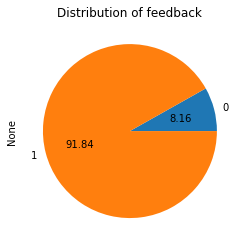

In [7]:
# Plotting Distribution of feedback
feedback = data.groupby('feedback').size()
feedback.plot.pie(title = 'Distribution of feedback',autopct='%.2f') # autopct is used for presenting persentage in pie chart

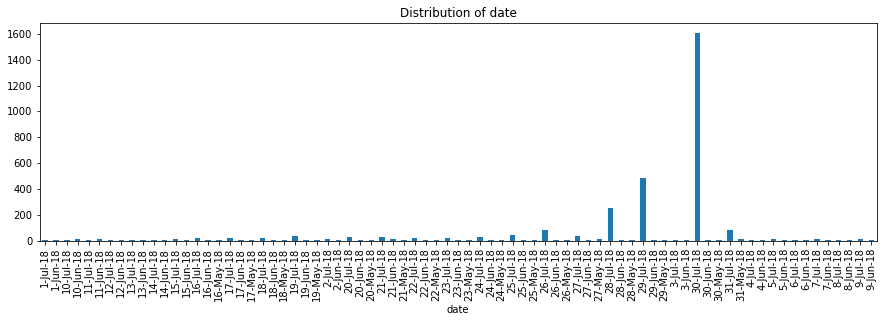

In [8]:
# Plotting Distribution of Date
date = data.groupby('date').size()
date.plot.bar(title = 'Distribution of date',figsize = (15,4))

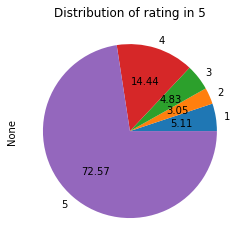

In [9]:
# Plotting Distribution of Rating
date = data.groupby('rating').size()
date.plot.pie(title = 'Distribution of rating in 5',autopct='%.2f')

In [10]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [11]:
# ========== Performing Cleaning operations on Data ==============

# importing Libraries

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
lemmatizer = WordNetLemmatizer()
punct = string.punctuation
stopwords = set(stopwords.words('english'))


def text_clean(text):
    text = text.lower()  #Convert text in lower case
    punc_removed = [char for char in text if char not in punct]  #Removing Punctuations
    punc_removed_join = ''.join(punc_removed)
    
    #Lemmatizing and removing Stop words
    punc_removed_clean = [lemmatizer.lemmatize(word) for word in punc_removed_join.split() if word not in stopwords]
    
    #Removing word those length is 1 or 2
    punc_removed_clean = [word for word in punc_removed_clean if len(word) > 2] 
    punc_removed_clean_join = ' '.join(punc_removed_clean)
    
    return punc_removed_clean_join

In [12]:
data['clean_reviews'] = data['verified_reviews'].apply(text_clean)
data.head()

,rating,date,variation,verified_reviews,feedback,clean_reviews
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing old learns dinosaur control ligh...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music


In [13]:
# Getting Text Sentiment Analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid_txt = SentimentIntensityAnalyzer()

def sentiment(text):
    score = sid_txt.polarity_scores(text)
    return score

In [14]:
data['score'] = data['clean_reviews'].apply(sentiment) #apply sentiment analysis function
data.head()

,rating,date,variation,verified_reviews,feedback,clean_reviews,score
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo,"{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'comp..."
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...,"{'neg': 0.145, 'neu': 0.654, 'pos': 0.201, 'co..."
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing old learns dinosaur control ligh...,"{'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'comp..."
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [15]:
data['compound'] = data['score'].apply(lambda score_dict: score_dict['compound']) #getting compound value
data['polarity'] = data['compound'].apply(lambda x: 'Positive' if x > 0 else ('Neutral' if x==0 else 'Negative')) #getting polarity positve or negative

In [16]:
data.head()

,rating,date,variation,verified_reviews,feedback,clean_reviews,score,compound,polarity
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love echo,"{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'comp...",0.6369,Positive
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.5994,Positive
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,sometimes playing game answer question correct...,"{'neg': 0.145, 'neu': 0.654, 'pos': 0.201, 'co...",0.0516,Positive
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,lot fun thing old learns dinosaur control ligh...,"{'neg': 0.0, 'neu': 0.425, 'pos': 0.575, 'comp...",0.9169,Positive
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


In [17]:
# Storing data value in new variable
df= pd.DataFrame(data, columns = ['rating' , 'date', 'variation','verified_reviews','feedback' ,'clean_reviews','score','compound','polarity' ])


In [18]:
df.to_csv('analysed_dataset',sep='\t') # Writing data in new file

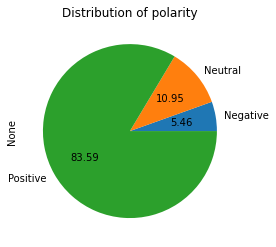

In [24]:
# Plotting Distribution of Rating
polarity = data.groupby('polarity').size()
polarity.plot.pie(title = 'Distribution of polarity',autopct='%.2f')